### Student Information
Name: ÊûóË≤ùËä∏ Lin,Pei-Yun

Student ID: 113086852

GitHub ID: u105500014-wq

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [125]:
### Begin Assignment Here 
#ËÆÄÂá∫Ë≥áÊñô
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

df = pd.read_csv("./newdataset/Reddit-stock-sentiment.csv")
df


type             datetime  post_id         subreddit  \
0    comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1    comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2    comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3       post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4    comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   
..       ...                  ...      ...               ...   
842  comment   2021-06-30 4:06:06  h3iv6pq  stockstobuytoday   
843  comment   2025-04-11 5:01:24  mmijiuz       StockMarket   
844     post  2025-03-24 12:30:39  1jipi4v  stockstobuytoday   
845  comment  2025-04-11 20:13:26  mmmely7    wallstreetbets   
846  comment   2025-04-12 3:09:06  mmobyz1    wallstreetbets   

                                                 title                author  \
0      Retardation is on the menu boys! WSB is so back          StickyTip420   
1    Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2    How do you feel about a sitting president maki...          Btankersly66   
3                                Who knows more? $VMAR             emiljenfn   
4    The Trump administration is begging Xi Jinping...          Just-Big6411   
..                                                 ...                   ...   
842  $MRIN Marin Software killed it today. Hope som...   Ordinary-Office9180   
843                     $ U.S. dollar value (crashing)            lulububudu   
844                            Analyst Recommendations               saasfin   
845  Weekend Discussion Thread for the Weekend of A...          yes_ur_wrong   
846                   Someone post the hotline please.           I_am_Nerman   

                                                   url  upvotes  downvotes  \
0                 https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1                 https://i.redd.it/7tl6puv9waue1.jpeg      -15        NaN   
2    https://apnews.com/article/trump-truth-social-...        1        NaN   
3    https://www.reddit.com/r/stockstobuytoday/comm...       30        0.0   
4    https://edition.cnn.com/2025/04/10/politics/tr...        1        NaN   
..                                                 ...      ...        ...   
842  https://www.reddit.com/r/stockstobuytoday/comm...        1        NaN   
843               https://i.redd.it/atvlo83gk4ue1.jpeg        2        NaN   
844  https://www.reddit.com/r/stockstobuytoday/comm...        1        0.0   
845  https://www.reddit.com/r/wallstreetbets/commen...       10        NaN   
846               https://i.redd.it/tcfuu97p7bue1.jpeg        1        NaN   

     upvote_ratio                                               text  \
0             NaN                                   Calls on retards   
1             NaN  Stunt as in like why did they even make a big ...   
2             NaN                  Seeing lots of red in the ticker.   
3            0.98  Vision Marine Technologies Inc. is rewriting t...   
4             NaN                           He didn‚Äôt say thank you.   
..            ...                                                ...   
842           NaN        Invest now it is going to shoot up tomorrow   
843           NaN                             Where can I read this?   
844          1.00  Upgrades, Downgrades\n\n [Stock Analyst Recomm...   
845           NaN  i sold my puts so i expect cheeto to declare w...   
846           NaN                       ![img](emote|t5_2th52|31224)   

     subjectivity  polarity  sentiment  \
0        1.000000 -0.900000       -1.0   
1        0.177778  0.083333        1.0   
2        0.000000  0.000000        0.0   
3        0.646970  0.216383        1.0   
4        0.000000  0.000000        0.0   
..            ...       ...        ...   
842      0.000000  0.000000        0.0   
843      0.000000  0.000000        0.0   
844      0.000000  0.000000        0.0   
845      0.000000  0.000000        0.0   
846      0.0

In [126]:
#Êåë‰∏âÂÄãÊàëË¶∫ÂæóÊØîËºÉÁõ∏ÈóúÁöÑÊ¨Ñ‰Ωç
df = df[["text", "sentiment", "label"]].copy()

#Âä†‰∏ä‰∏âÁ®ÆÊÉÖÁ∑íÁöÑÊñáÂ≠óÊ®ôÁ±§
label_map = {1.0: "positive", 0.0: "neutral", -1.0: "negative"}
df["category"] = df["label"]
df["category_name"] = df["label"].map(label_map)

#ÁúãÂâçÂπæÁ≠ÜË≥áÊñô
df.head()


text  sentiment  label  \
0                                   Calls on retards       -1.0   -1.0   
1  Stunt as in like why did they even make a big ...        1.0    0.0   
2                  Seeing lots of red in the ticker.        0.0    0.0   
3  Vision Marine Technologies Inc. is rewriting t...        1.0    1.0   
4                           He didn‚Äôt say thank you.        0.0   -1.0   

   category category_name  
0      -1.0      negative  
1       0.0       neutral  
2       0.0       neutral  
3       1.0      positive  
4      -1.0      negative

In [127]:
#Á¢∫Ë™çÁ∏ΩÁ≠ÜÊï∏Ë∑ü‰∏äÈù¢‰∏ÄÊ®£ÊòØ847
print("Number of records:", len(df))

#‰∫ÜËß£labelÂàÜÂ∏É
print(df["category_name"].value_counts())

#Èö®Ê©üÊåëÂπæÁ≠ÜÁúãÊúâÊ≤íÊúâÂïèÈ°å
print(df.sample(6, random_state=42))


Number of records: 847
category_name
neutral     423
negative    315
positive    109
Name: count, dtype: int64
                                                  text  sentiment  label  \
457                                          "We" who?        0.0    0.0   
342                                     Chicken jockey       -1.0    0.0   
280                                      Not great Bob        1.0   -1.0   
275  Speak for yourself, my wife is being harder on...        1.0    0.0   
843                             Where can I read this?        0.0    0.0   
734                       That's a chart since April 6        0.0    0.0   

     category category_name  
457       0.0       neutral  
342       0.0       neutral  
280      -1.0      negative  
275       0.0       neutral  
843       0.0       neutral  
734       0.0       neutral  


In [128]:
#Ê™¢Êü•ÊúâÁÑ°Áº∫ÊºèÈ†ÖÁõÆ
print(df.isnull().sum())

#Ê∏ÖÁêÜÁº∫textÁöÑÂàó
df = df.dropna(subset=["text"])


text             0
sentiment        0
label            0
category         0
category_name    0
dtype: int64


In [129]:
#ÊääÊñáÂ≠óË≥áÊñôËΩâÊèõÊàêÊï∏Â≠óÁü©Èô£,ÈõªËÖ¶ÊâçÂèØÁêÜËß£
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words="english")
X_counts = count_vect.fit_transform(df["text"])

print("Shape of term-document matrix:", X_counts.shape)


Shape of term-document matrix: (847, 4105)


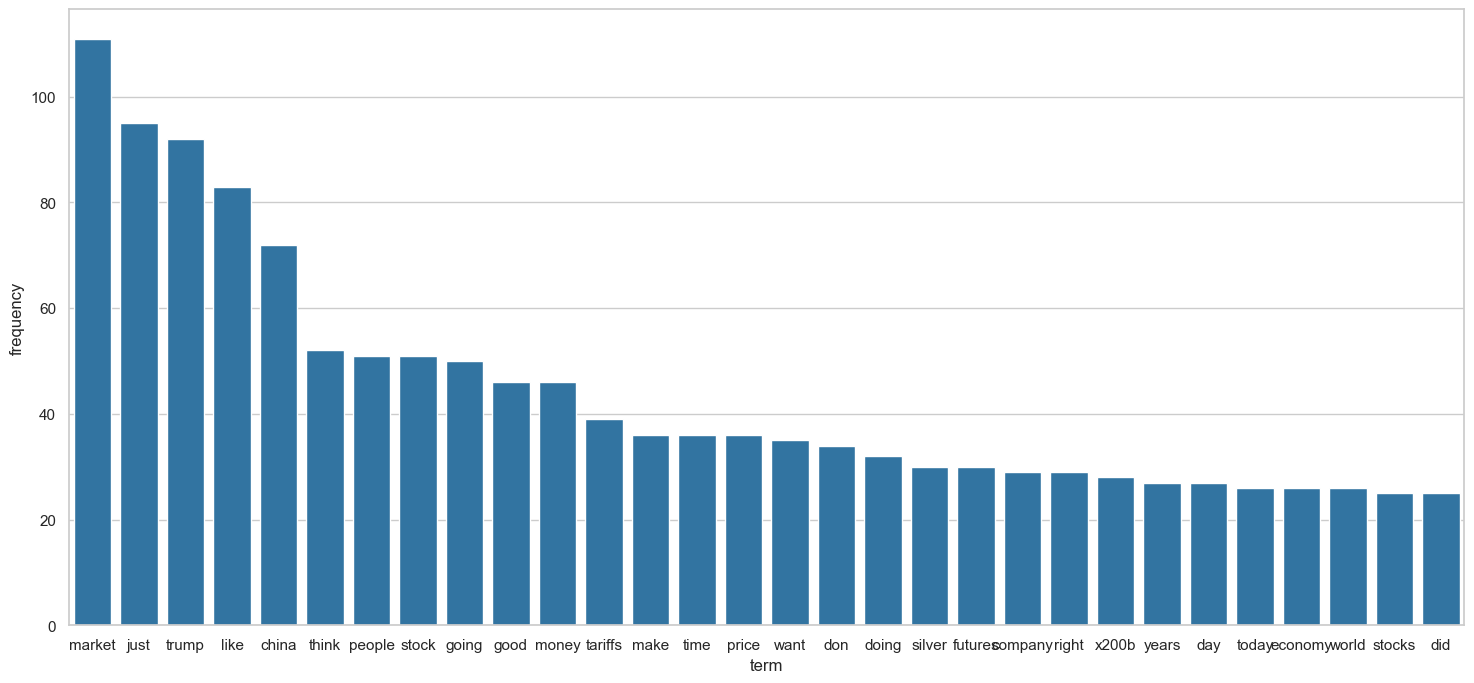

In [130]:
#Ë©ûÂΩôÂá∫ÁèæÈ†ªÁéáË®àÁÆó
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

#Â∞áÂÖ∂ÊéíÂ∫è
terms = count_vect.get_feature_names_out()
df_terms = pd.DataFrame({"term": terms, "frequency": term_frequencies})
df_terms = df_terms.sort_values(by="frequency", ascending=False)

#ÈÅ∏"Ââç30"Â∏∏Âá∫ÁèæÁöÑË©ûÂΩôÁï´ÊàêÂúñË°®
plt.figure(figsize=(18,8))
sns.barplot(x="term", y="frequency", data=df_terms.head(30))
plt.xticks(rotation=0)
plt.show()


In [131]:
#Áî®plotlyÂëàÁèæ
fig = px.bar(df_terms.head(30), x="term", y="frequency", 
             title="Top 30 Terms")
fig.show()

#logÊ∏õÂ∞ëÂ∑ÆÁï∞
import math
df_terms["frequency_log"] = df_terms["frequency"].apply(lambda x: math.log(x+1))


fig = px.bar(df_terms.head(30), x="term", y="frequency_log",
             title="Top 30 Terms")
fig.show()


## Ë¶ñË¶∫ÂåñÂúñÂΩ¢

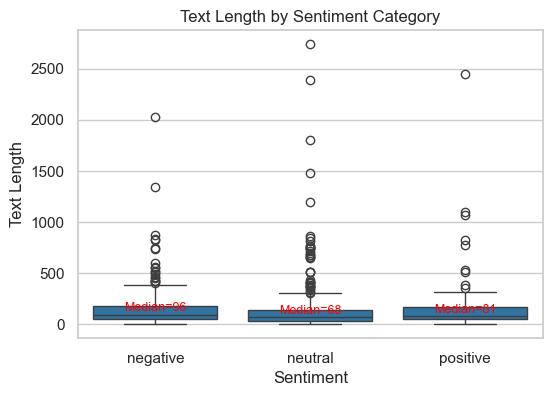

In [132]:
#ÊñáÂ≠óÈï∑Â∫¶Áúã‰æÜÂú®ÊÉÖÁ∑íÁöÑËæ®Ë≠ò‰∏äÊ≤íÊúâÂ§™Â§ßÁöÑÂ∑ÆÁï∞

#Âª∫Á´ãÊñáÂ≠óÈï∑Â∫¶Ê¨Ñ‰Ωç
df["text_length"] = df["text"].astype(str).apply(len)

plt.figure(figsize=(6,4))
sns.boxplot(x="category_name", y="text_length", data=df)
plt.title("Text Length by Sentiment Category")
plt.xlabel("Sentiment")
plt.ylabel("Text Length")

#Âú®Âúñ‰∏äÊ®ôË®ª‰∏≠‰ΩçÊï∏
medians = df.groupby("category_name")["text_length"].median()
for i, median in enumerate(medians):
    plt.text(i, median + 2, f"Median={int(median)}", 
             ha='center', va='bottom', fontsize=9, color="red")

plt.show()


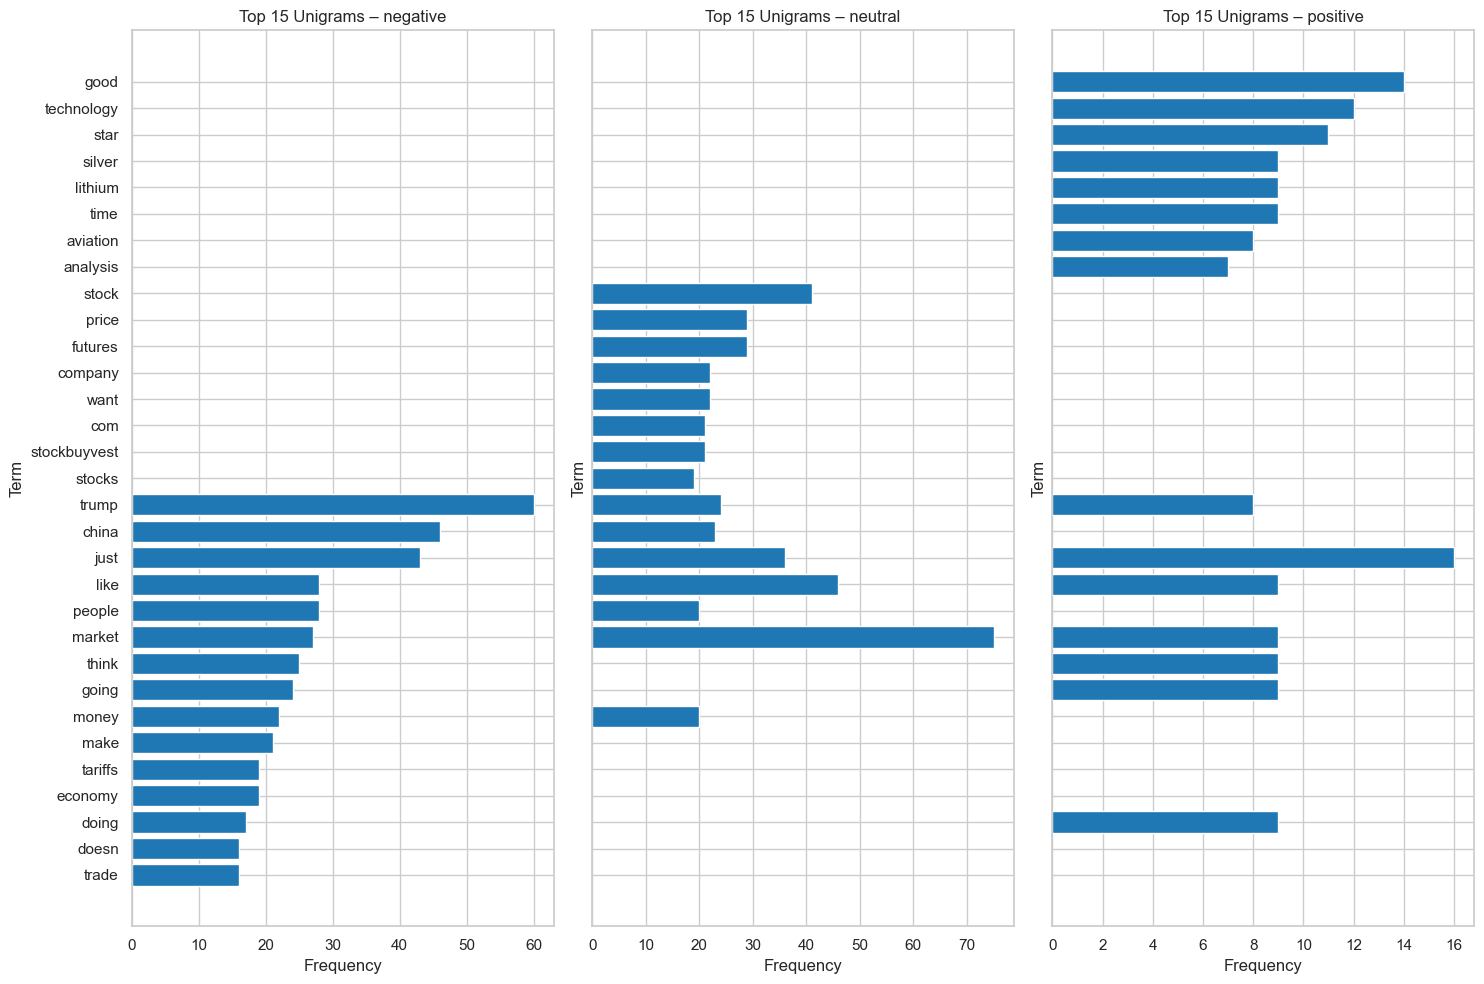

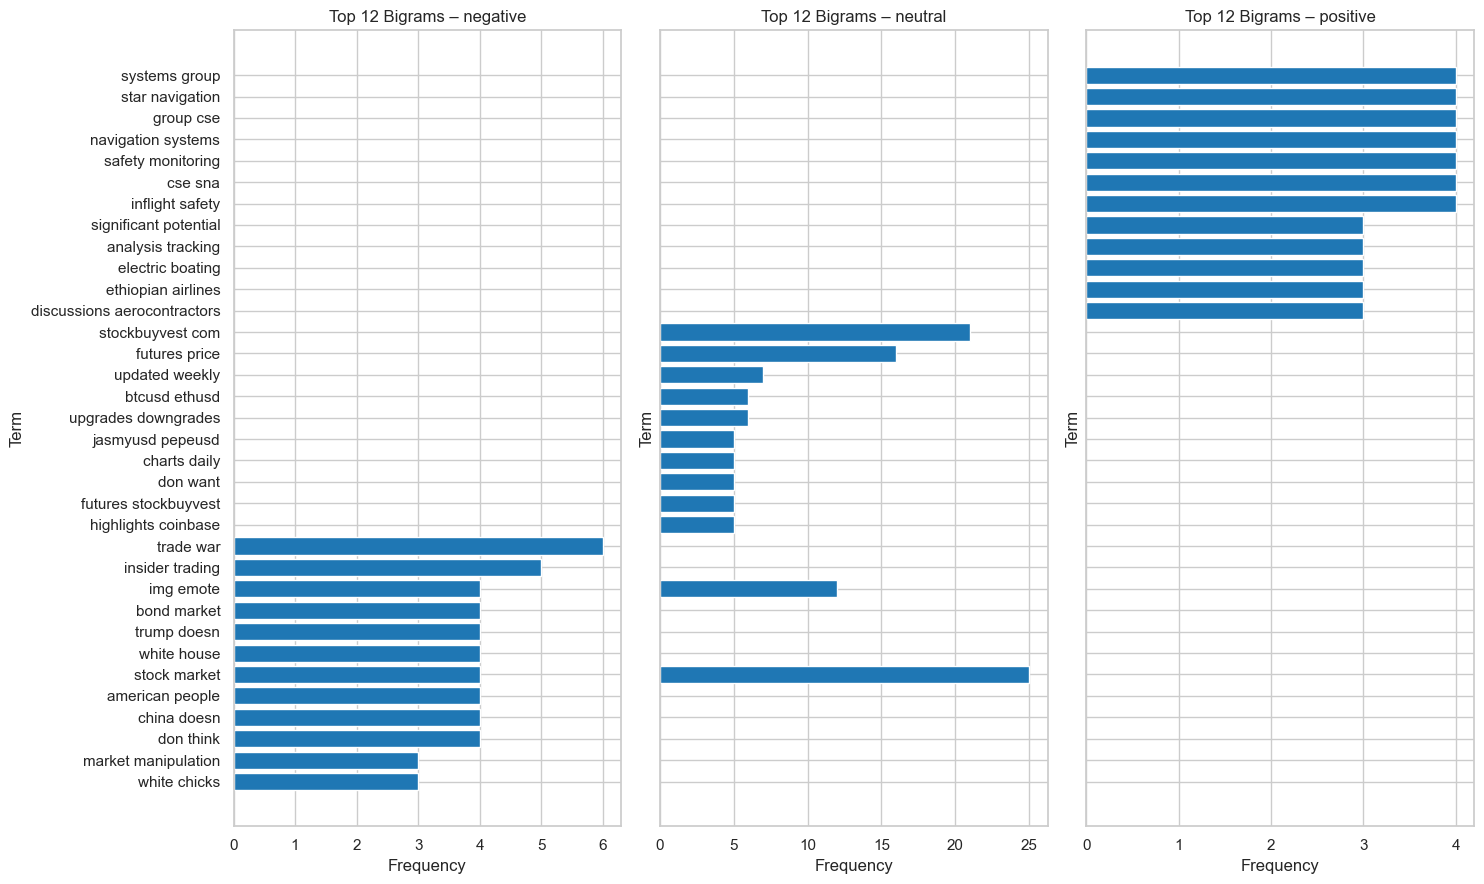

In [133]:
#‰∏ÄÈñãÂßãÊàëÁî®ÊñáÂ≠óÈï∑Â∫¶‰æÜÊØîËºÉ‰∏çÂêåÊÉÖÁ∑íÁöÑÂ∑ÆÁï∞Ôºå‰ΩÜÁµêÊûúÁúã‰∏çÂá∫ÊòéÈ°ØÂ∑ÆÂà•„ÄÇ
#ÂñÆÁ¥îÁµ±Ë®àÂ≠óÊï∏‰∏¶‰∏çËÉΩËß£ÈáãÊÉÖÁ∑í‰∏äÁöÑ‰∏çÂêåÔºåÊâÄ‰ª•ÊàëÊîπÂæûË©ûÂΩôÁöÑËßíÂ∫¶‰æÜËßÄÂØüÔºåÊääÊñáÂ≠óÊñ∑Ë©ûÂæåÔºå
#ÂàÜÂà•ÊåëÂá∫Ê≠£Âêë„ÄÅ‰∏≠Á´ã„ÄÅË≤†Âêë‰∏âÁ®ÆÊÉÖÁ∑í‰∏≠ÊúÄÂ∏∏Âá∫ÁèæÁöÑÂñÆÂ≠óÂíåÈõôË©ûÁµÑÂêà„ÄÇ
#ÈÄôÊ®£ËÉΩÊõ¥Ê∏ÖÊ•öÁúãÂá∫Âì™‰∫õË©ûË∑ü‰∏çÂêåÊÉÖÁ∑íÊØîËºÉÊúâÈóúÔºå‰πüÊØîÂñÆÁ¥îÂ≠óÊï∏ÁöÑÊØîËºÉÊõ¥ÊúâÊÑèÁæ©„ÄÇ


#Á¢∫‰øùÊúâcategory_name
label_map = {1.0: "positive", 0.0: "neutral", -1.0: "negative"}
if "category_name" not in df.columns:
    df["category"] = df["label"]
    df["category_name"] = df["label"].map(label_map)

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
sns.set_style("whitegrid")


#ÊäìTop-NÂñÆË©ûÊàñÈõôË©û
def top_ngrams_for_class(frame, label_col, label_value, text_col="text",
                         ngram_range=(1,1), topn=15):
    sub = frame[frame[label_col] == label_value]
    vect = CountVectorizer(stop_words="english", ngram_range=ngram_range,
                           token_pattern=r"(?u)\b[a-zA-Z][a-zA-Z]+\b")  # Âè™‰øùÁïôËá≥Â∞ëÂÖ©ÂÄãÂ≠óÊØçÁöÑË©û
    Xc = vect.fit_transform(sub[text_col].astype(str))
    freqs = np.asarray(Xc.sum(axis=0)).ravel()
    terms = vect.get_feature_names_out()
    out = pd.DataFrame({"term": terms, "freq": freqs}).sort_values("freq", ascending=False).head(topn)
    return out

#ÂúñÔº°ÔºöÊØèÂÄãÊÉÖÁ∑íÁöÑTop-15ÂñÆÂ≠ó
topn = 15
cats = ["negative", "neutral", "positive"]
fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=True)
for ax, c in zip(axes, cats):
    top_uni = top_ngrams_for_class(df, "category_name", c, ngram_range=(1,1), topn=topn)
    ax.barh(top_uni["term"][::-1], top_uni["freq"][::-1])
    ax.set_title(f"Top {topn} Unigrams ‚Äì {c}")
    ax.set_xlabel("Frequency"); ax.set_ylabel("Term")
plt.tight_layout(); plt.show()

#ÂúñBÔºöÊØèÂÄãÊÉÖÁ∑íÁöÑTop-15ÈõôË©û(ÈõôË©ûÔºùÂÖ©ÂÄãÂñÆÂ≠óÁµÑÂêàËÄåÊàê)
topn_bi = 12
fig, axes = plt.subplots(1, 3, figsize=(15, 9), sharey=True)
for ax, c in zip(axes, cats):
    top_bi = top_ngrams_for_class(df, "category_name", c, ngram_range=(2,2), topn=topn_bi)
    ax.barh(top_bi["term"][::-1], top_bi["freq"][::-1])
    ax.set_title(f"Top {topn_bi} Bigrams ‚Äì {c}")
    ax.set_xlabel("Frequency"); ax.set_ylabel("Term")
plt.tight_layout(); plt.show()


#ÈÄôÊ®£Â∞±ÂèØ‰ª•Ê∏ÖÊ•öÂú∞ÁúãÂá∫‰∏âÁ®ÆÊÉÖÁ∑íÁöÑÂêÑË∑üÂì™‰∫õË™ûË©ûÊúâÈóúÔºåÂπ´Âä©ÊàëÂÄëÁêÜËß£ÈõªËÖ¶ÊòØÈù†ÈÄô‰∫õË©û‰æÜÂà§Êñ∑ÊÉÖÁ∑íÁöÑ„ÄÇ


# Phase 2

In [145]:
# ---------- 0) Imports & Global Config ----------
import re, math, numpy as np, pandas as pd
from collections import Counter
from itertools import combinations

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer, Binarizer

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")

# NLTK ÂÅúÁî®Ë©ûÔºàÁí∞Â¢ÉÊ≤íÊúâ‰πü‰∏çÂΩ±ÈüøÂü∑Ë°åÔºâ
try:
    import nltk
    nltk.download('stopwords', quiet=True)
    from nltk.corpus import stopwords
    STOPWORDS = set(stopwords.words('english'))
except Exception:
    STOPWORDS = set()

RSEED = 42
np.random.seed(RSEED)

print("[INFO] Libraries imported.")


# ---------- 1) Load Data ----------
# Ë™™ÊòéÔºö
# - Âè™Âèñ text / labelÔºå‰∏¶Âª∫Á´ãÂ≠ó‰∏≤Ê®ôÁ±§‰æøÊñºËßÄÂØü
DATA_PATH = "/Users/parinmac/Documents/Assignments/DM2025-Lab1-Exercise/newdataset/Reddit-stock-sentiment.csv"

df = pd.read_csv(DATA_PATH)
df = df[['text', 'label']].dropna()
label_map = {-1.0:'negative', 0.0:'neutral', 1.0:'positive'}
df['category_name'] = df['label'].map(label_map)

print("[INFO] Data loaded:", df.shape)
print(df['category_name'].value_counts())

[INFO] Libraries imported.
[INFO] Data loaded: (847, 3)
category_name
neutral     423
negative    315
positive    109
Name: count, dtype: int64


In [135]:
# ---------- 2) BaselineÔºöBoW / TF-IDF + Naive Bayes ----------
# Ë™™ÊòéÔºö
# - ÂÖàÂª∫Á´ãÂèØÈáçÁèæÁöÑ baseline
# - BoW+MultinomialNB ÈÄöÂ∏∏Âú®Áü≠ÊñáÊú¨Ë°®ÁèæÁ©©ÂÆöÔºõTF-IDF+ComplementNB ÁÇ∫Â∏∏Ë¶ãÂ∞çÁÖß

train_text, test_text, y_train, y_test = train_test_split(
    df['text'].astype(str), df['category_name'],
    test_size=0.3, random_state=RSEED, stratify=df['category_name']
)

# 2.1 CountVectorizer + MultinomialNB
bow = CountVectorizer(stop_words='english', token_pattern=r"(?u)\b[a-zA-Z][a-zA-Z]+\b")
Xtr_bow = bow.fit_transform(train_text)
Xte_bow = bow.transform(test_text)
nb_bow = MultinomialNB().fit(Xtr_bow, y_train)
pred_bow = nb_bow.predict(Xte_bow)
acc_bow = accuracy_score(y_test, pred_bow)
print("\n[Baseline] Count + MultinomialNB  Accuracy:", acc_bow)
print(classification_report(y_test, pred_bow, digits=4))

# 2.2 TF-IDF + ComplementNB
tfidf = TfidfVectorizer(stop_words='english', token_pattern=r"(?u)\b[a-zA-Z][a-zA-Z]+\b",
                        sublinear_tf=True)
Xtr_tfidf = tfidf.fit_transform(train_text)
Xte_tfidf = tfidf.transform(test_text)
nb_tfidf = ComplementNB().fit(Xtr_tfidf, y_train)
pred_tfidf = nb_tfidf.predict(Xte_tfidf)
acc_tfidf = accuracy_score(y_test, pred_tfidf)
print("\n[Baseline] TF-IDF + ComplementNB Accuracy:", acc_tfidf)
print(classification_report(y_test, pred_tfidf, digits=4))


[Baseline] Count + MultinomialNB  Accuracy: 0.5647058823529412
              precision    recall  f1-score   support

    negative     0.5207    0.6632    0.5833        95
     neutral     0.6231    0.6378    0.6304       127
    positive     0.0000    0.0000    0.0000        33

    accuracy                         0.5647       255
   macro avg     0.3812    0.4337    0.4046       255
weighted avg     0.5043    0.5647    0.5313       255


[Baseline] TF-IDF + ComplementNB Accuracy: 0.49019607843137253
              precision    recall  f1-score   support

    negative     0.4853    0.6947    0.5714        95
     neutral     0.6000    0.4488    0.5135       127
    positive     0.0833    0.0606    0.0702        33

    accuracy                         0.4902       255
   macro avg     0.3895    0.4014    0.3850       255
weighted avg     0.4904    0.4902    0.4777       255



In [136]:
# ---------- 3) Frequent Pattern MiningÔºöPlan AÔºàFP-GrowthÔºâ ----------
# Ë™™ÊòéÔºö
# - ‰ª•„ÄåÊØèÁØáÊñá‰ª∂=‰∫§Êòì„ÄÅÂñÆÂ≠ó=items„ÄçÂª∫ transactions
# - Reddit Áü≠ÊñáÊú¨Â∏∏Ë¶ãÔºö‰ª•‰∏ÄËà¨ÈñÄÊ™ªÊâæ‰∏çÂà∞Èï∑Â∫¶‚â•2‰πãÊ®£ÂºèÔºà‰ΩéÂÖ±ÁèæÔºâ
def clean_tokens(text: str):
    toks = re.findall(r"[a-z]{2,}", str(text).lower())
    if STOPWORDS:
        toks = [t for t in toks if t not in STOPWORDS]
    return toks

df['tokens'] = df['text'].astype(str).apply(clean_tokens)
transactions = [list(set(toks)) for toks in df['tokens'] if toks]  # Êñá‰ª∂Á¥öÂéªÈáç
print(f"\n[FPM] ÊúâÊïà transactionsÔºö{len(transactions)}")

pairs_plus = {}
try:
    from PAMI.frequentPattern.basic.FPGrowth import FPGrowth
    min_support_abs = 2  # Ëá≥Â∞ëÂá∫ÁèæÂú® 2 ÁØáÊñá‰ª∂
    fp = FPGrowth(transactions, min_support_abs)
    fp.mine()
    freq_patterns = fp.getPatterns()
    pairs_plus = {items: sup for items, sup in freq_patterns.items() if len(items) >= 2}
    print("[FPM] FP-Growth Èï∑Â∫¶‚â•2 ÁöÑÊ®£ÂºèÊï∏Ôºö", len(pairs_plus))
    if pairs_plus:
        top10 = sorted(pairs_plus.items(), key=lambda kv: kv[1], reverse=True)[:10]
        print("[FPM] Top-10 pairs:", top10)
    else:
        print("[FPM] ‰ª•Êú¨ÈñÄÊ™ªÂú®Áü≠ÊñáÊú¨‰∏≠Êú™Êì∑ÂèñÂà∞ pairsÔºàÂ∏∏Ë¶ãÊÉÖÊ≥ÅÔºâ„ÄÇ")
except Exception as e:
    print("[FPM] Ë∑≥ÈÅéÔºàÁí∞Â¢ÉÁÑ° PAMI ÊàñÂü∑Ë°åÂ§±ÊïóÔºâÔºö", e)


[FPM] ÊúâÊïà transactionsÔºö838
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
[FPM] FP-Growth Èï∑Â∫¶‚â•2 ÁöÑÊ®£ÂºèÊï∏Ôºö 0
[FPM] ‰ª•Êú¨ÈñÄÊ™ªÂú®Áü≠ÊñáÊú¨‰∏≠Êú™Êì∑ÂèñÂà∞ pairsÔºàÂ∏∏Ë¶ãÊÉÖÊ≥ÅÔºâ„ÄÇ


In [137]:
# FP-GrowthÁµêÊûúÔºöÈï∑Â∫¶ ‚â• 2 ÁöÑË©ûÁµÑ = 0ÔºåÊ≤íÊúâÊâæÂà∞„ÄÇ
# Êé®Ê∏¨ÂèØËÉΩÂéüÂõ†ÔºöReddit ÁïôË®ÄÂ§ßÂ§öÂæàÁü≠ÔºõÂêå‰∏ÄÂ∞çË©ûÂú®‰∏çÂêåÊñáÁ´†Ë£°‰∏ÄËµ∑Âá∫ÁèæÁöÑÊ¨°Êï∏ÂæàÂ∞ëÔºåÊâÄ‰ª•ÈÅî‰∏çÂà∞ÈñÄÊ™ª„ÄÇ

# ---------- 4) Frequent Pattern MiningÔºöPlan BÔºàPMI bigramÔºâ ----------
# Ë™™ÊòéÔºö
# - Ëã• FP-Growth ËæÉÈõ£Êì∑ÂèñÊ®£ÂºèÔºåÊîπ‰ª•„Äåbigram ÁöÑÊñá‰ª∂È†ªÁéá + PMI„ÄçÊåëÈ´òÈóúËÅØË©ûÈõô
# - Âèñ Top-K ËΩâÁÇ∫ 0/1 ‰∫åÂÄºÊ®£ÂºèÔºå‰ΩúÁÇ∫„ÄåÊì¥Â¢ûÁâπÂæµ„Äç

def to_bigrams(tokens):
    return list(zip(tokens, tokens[1:]))

doc_bigrams = [set(to_bigrams(toks)) for toks in df["tokens"]]

bigram_df_counter = Counter()
for s in doc_bigrams:
    bigram_df_counter.update(s)

MIN_DF = 3  # 2~5 Â∏∏Ë¶ãÔºõË¶ñË≥áÊñôË™øÊï¥
candidate_patterns = [(bg, c) for bg, c in bigram_df_counter.items() if c >= MIN_DF]
candidate_patterns.sort(key=lambda x: x[1], reverse=True)
print(f"\n[PMI] ÂÄôÈÅ∏ bigramÔºàDF‚â•{MIN_DF}ÔºâÊï∏ÈáèÔºö{len(candidate_patterns)}")
print("[PMI] Top-10 by DF:", candidate_patterns[:10])

N_docs = len(df)
unigram_df_counter = Counter()
for toks in df["tokens"]:
    unigram_df_counter.update(set(toks))

def p_word(w):
    return unigram_df_counter[w] / N_docs if unigram_df_counter[w] > 0 else 1e-12

def p_bigram(bg):
    return bigram_df_counter[bg] / N_docs if bigram_df_counter[bg] > 0 else 1e-12

def pmi(bg):
    (w1, w2) = bg
    return math.log2( p_bigram(bg) / (p_word(w1) * p_word(w2)) )

scored = []
for bg, c in candidate_patterns:
    try:
        scored.append((bg, c, pmi(bg)))
    except ZeroDivisionError:
        pass

scored_sorted = sorted(scored, key=lambda x: (x[2], x[1]), reverse=True)
print("[PMI] Top-10 by PMI:", scored_sorted[:10])

K = 100  # ‰πãÂâçÁöÑË®≠ÂÆöÔºõÂèØ‰æùÈúÄË¶Å 50/100/200 Ë™øÊï¥
topK_patterns = [bg for (bg, dfc, pmi_v) in scored_sorted[:K]]
pattern_cols = [f"pat::{a}_{b}" for (a, b) in topK_patterns]

pattern_mat = np.zeros((len(doc_bigrams), len(topK_patterns)), dtype=int)
pair_index = {pair: i for i, pair in enumerate(topK_patterns)}
for i, s in enumerate(doc_bigrams):
    for pair, j in pair_index.items():
        if pair in s:
            pattern_mat[i, j] = 1

pattern_df = pd.DataFrame(pattern_mat, columns=pattern_cols, index=df.index)
print("[PMI] pattern_df ÂΩ¢ÁãÄÔºö", pattern_df.shape)


[PMI] ÂÄôÈÅ∏ bigramÔºàDF‚â•3ÔºâÊï∏ÈáèÔºö143
[PMI] Top-10 by DF: [(('stockbuyvest', 'com'), 21), (('emote', 'th'), 12), (('img', 'emote'), 12), (('stock', 'market'), 12), (('bond', 'market'), 7), (('updated', 'weekly'), 7), (('trade', 'war'), 6), (('long', 'term'), 6), (('looks', 'like'), 6), (('btcusd', 'ethusd'), 6)]
[PMI] Top-10 by PMI: [(('liz', 'truss'), 3, 8.141255658611042), (('supreme', 'court'), 3, 8.141255658611042), (('pessimism', 'suggest'), 4, 7.726218159332198), (('depends', 'various'), 4, 7.726218159332198), (('various', 'factors'), 4, 7.726218159332198), (('indicates', 'optimism'), 4, 7.726218159332198), (('generally', 'indicates'), 4, 7.726218159332198), (('finra', 'ats'), 4, 7.726218159332198), (('analyst', 'recommendations'), 3, 7.726218159332198), (('upgrades', 'downgrades'), 3, 7.726218159332198)]
[PMI] pattern_df ÂΩ¢ÁãÄÔºö (847, 100)


In [138]:
# ---------- 5) AugmentÔºöËàá TDM/TF-IDF Âêà‰Ωµ ----------
count_vect_all = CountVectorizer(min_df=2, stop_words='english')
X_tdm_all = count_vect_all.fit_transform(df['text'].astype(str))
tdm_df = pd.DataFrame(X_tdm_all.toarray(),
                      columns=count_vect_all.get_feature_names_out(), index=df.index)

tfidf_vect_all = TfidfVectorizer(min_df=2, stop_words='english', sublinear_tf=True)
X_tfidf_all = tfidf_vect_all.fit_transform(df['text'].astype(str))
tfidf_df = pd.DataFrame(X_tfidf_all.toarray(),
                        columns=tfidf_vect_all.get_feature_names_out(), index=df.index)

aug_tdm_df   = pd.concat([tdm_df,   pattern_df], axis=1)
aug_tfidf_df = pd.concat([tfidf_df, pattern_df], axis=1)
print("[AUG] aug_tdm_df, aug_tfidf_dfÔºö", aug_tdm_df.shape, aug_tfidf_df.shape)

[AUG] aug_tdm_df, aug_tfidf_dfÔºö (847, 1592) (847, 1592)


/Users/parinmac/Documents/Assignments/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



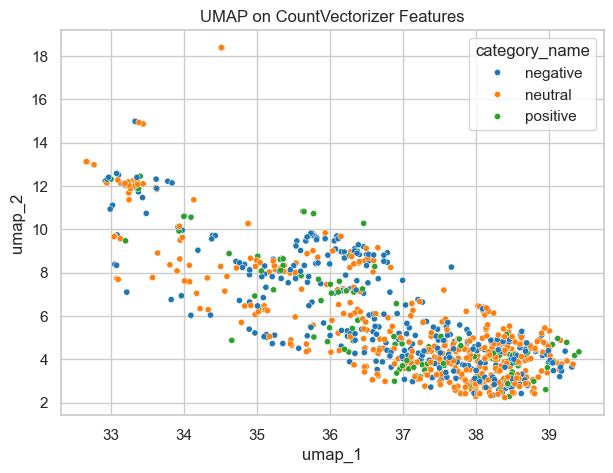

In [139]:
# ---------- 5.5 UMAPÈôçÁ∂≠Ë¶ñË¶∫Âåñ----------
# Ë™™ÊòéÔºö
# - Â∞áÈ´òÁ∂≠Ë©ûË¢ãÈôçÂà∞ 2DÔºåËßÄÂØü‰∏âÈ°ûÂàÜÂ∏É
# ÁµêÊûúÔºöÈ°èËâ≤‰ª£Ë°®Ê®ôÁ±§ÔºàÊ©òÔºöneutral„ÄÅËóçÔºönegative„ÄÅÁ∂†ÔºöpositiveÔºâ„ÄÇ
#      ÁúãÂà∞‰∏âËâ≤ÈªûÂ§ßÁØÑÂúçÈáçÁñäÔºåÂè™ÊòØ‰∏ÄÊ¢ùÈ¨ÜÊï£ÁöÑÂ∏∂ÁãÄÂàÜÂ∏É„ÄÇ
#      Â¶ÇÊûú 2D ‰∏äÊú¨‰æÜÂ∞±ÂæàÈõ£ÂàÜÈñãÔºåÂàÜÈ°ûÂô®Ë¶ÅÂú®ÂéüÈ´òÁ∂≠Á©∫ÈñìÂÆåÂÖ®ÂàÜÈñãÊ©üÁéá‰πü‰∏çÈ´òÔºàÈô§ÈùûÊèõË°®Á§∫Ê≥ï/ÁâπÂæµÂæàÂº∑Ôºâ„ÄÇ
#      È°ØÁ§∫Ê≠§Ë≥áÊñôÊú¨Ë≥™‰∏çÂ•ΩÂàÜ„ÄÇ
try:
    import umap
    reducer = umap.UMAP(n_components=2, random_state=RSEED)
    X_umap = reducer.fit_transform(X_tdm_all)
    df['umap_1'], df['umap_2'] = X_umap[:, 0], X_umap[:, 1]
    fig, ax = plt.subplots(figsize=(7,5))
    sns.scatterplot(data=df, x='umap_1', y='umap_2', hue='category_name', s=20, ax=ax)
    ax.set_title("UMAP on CountVectorizer Features")
    plt.show()
except Exception as e:
    print("[UMAP] Ë∑≥ÈÅéÔºàÁí∞Â¢ÉÁÑ° umap-learn ÊàñÂü∑Ë°åÂ§±ÊïóÔºâÔºö", e)

In [140]:
# ---------- 5.6 Discretization & Binarization ----------
# Ë™™ÊòéÔºö
# - Â∞á text_length ÂÅö‰∏âÁ≠âÂàÜËàá‰∫åÂÄºÂåñÔºåÁ§∫ÁØÑÊï∏ÂÄºÁâπÂæµËôïÁêÜ
df["text_length"] = df["text"].astype(str).apply(len)
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df['text_length_discrete'] = discretizer.fit_transform(df[['text_length']])
median_length = df['text_length'].median()
binarizer = Binarizer(threshold=median_length)
df['text_length_binary'] = binarizer.fit_transform(df[['text_length']])
print(df[['text_length','text_length_discrete','text_length_binary']].head())

   text_length  text_length_discrete  text_length_binary
0           16                   0.0                   0
1          137                   0.0                   1
2           33                   0.0                   0
3         1067                   1.0                   1
4           24                   0.0                   0


In [141]:
# ---------- 5.7 ClassificationÔºöÂõõÁµÑÂ∞çÁÖß ----------
# Ë™™ÊòéÔºö
# - ‰ª•„ÄåÊ®°Âûã√óÁâπÂæµ„ÄçÂõõÁµÑÂ∞çÁÖßÔºå‰∏¶Âç∞Âá∫Â†±Ë°®
y_num = df['label']

def eval_nb(X, y, name, use_cnb=False):
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=RSEED)
    clf = ComplementNB() if use_cnb else MultinomialNB()
    clf.fit(Xtr, ytr)
    pred = clf.predict(Xte)
    acc = accuracy_score(yte, pred)
    print(f"\n[CLS] {name}  Accuracy: {acc:.4f}")
    print(classification_report(yte, pred, digits=4))
    return acc

acc_bow_full   = eval_nb(tdm_df,       y_num, "MultinomialNB + TDM")
acc_tfidf_full = eval_nb(tfidf_df,     y_num, "ComplementNB + TF-IDF", use_cnb=True)
acc_aug_tdm    = eval_nb(aug_tdm_df,   y_num, "MultinomialNB + Aug(TDM+PMI)")
acc_aug_tfidf  = eval_nb(aug_tfidf_df, y_num, "ComplementNB + Aug(TF-IDF+PMI)", use_cnb=True)



[CLS] MultinomialNB + TDM  Accuracy: 0.5608
              precision    recall  f1-score   support

        -1.0     0.5391    0.6327    0.5822        98
         0.0     0.6111    0.6364    0.6235       121
         1.0     0.2857    0.1111    0.1600        36

    accuracy                         0.5608       255
   macro avg     0.4787    0.4600    0.4552       255
weighted avg     0.5375    0.5608    0.5422       255


[CLS] ComplementNB + TF-IDF  Accuracy: 0.4902
              precision    recall  f1-score   support

        -1.0     0.4918    0.6122    0.5455        98
         0.0     0.5644    0.4711    0.5135       121
         1.0     0.2500    0.2222    0.2353        36

    accuracy                         0.4902       255
   macro avg     0.4354    0.4352    0.4314       255
weighted avg     0.4921    0.4902    0.4865       255


[CLS] MultinomialNB + Aug(TDM+PMI)  Accuracy: 0.5412
              precision    recall  f1-score   support

        -1.0     0.5194    0.6837    

/Users/parinmac/Documents/Assignments/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Users/parinmac/Documents/Assignments/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Users/parinmac/Documents/Assignments/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul

/Users/parinmac/Documents/Assignments/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Users/parinmac/Documents/Assignments/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Users/parinmac/Documents/Assignments/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py

In [142]:
# Decision Tree
Xtr, Xte, ytr, yte = train_test_split(aug_tdm_df, y_num, test_size=0.3, random_state=RSEED)
dt = DecisionTreeClassifier(random_state=RSEED, min_samples_leaf=2)
dt.fit(Xtr, ytr)
pred_dt = dt.predict(Xte)
acc_dt = accuracy_score(yte, pred_dt)
print("\n[CLS] DecisionTree + Aug(TDM) Accuracy:", round(acc_dt, 4))
print(classification_report(yte, pred_dt, digits=4))


[CLS] DecisionTree + Aug(TDM) Accuracy: 0.4902
              precision    recall  f1-score   support

        -1.0     0.4468    0.4286    0.4375        98
         0.0     0.5263    0.6612    0.5861       121
         1.0     0.3333    0.0833    0.1333        36

    accuracy                         0.4902       255
   macro avg     0.4355    0.3910    0.3856       255
weighted avg     0.4685    0.4902    0.4651       255



In [143]:
# ÊàêÁ∏æÁ∏ΩË°®
summary = pd.DataFrame([
    ["MultinomialNB + TDM",              acc_bow_full],
    ["ComplementNB + TF-IDF",            acc_tfidf_full],
    ["MultinomialNB + Aug(TDM+PMI)",     acc_aug_tdm],
    ["ComplementNB + Aug(TF-IDF+PMI)",   acc_aug_tfidf],
    ["DecisionTree + Aug(TDM)",          acc_dt],
], columns=["Model", "Accuracy"])

# ÊºÇ‰∫ÆË°®Ê†ºÈ°ØÁ§∫
print("\n=== Model Comparison (Accuracy) ===")
display(summary.style.set_properties(**{'text-align': 'center'}))


=== Model Comparison (Accuracy) ===


In [144]:
# ---------- 6) ÊØèÈ°ûÂà•ÁöÑ bigramÔºàÊñá‰ª∂È†ªÁéá Top-5Ôºâ ----------
cats = ['positive', 'neutral', 'negative']
def to_bigrams(tokens):
    return list(zip(tokens, tokens[1:]))

for cat in cats:
    sub = df[df['category_name'] == cat]
    sub_pairs = Counter()
    for toks in sub['tokens']:
        sub_pairs.update(set(to_bigrams(toks)))
    top5 = sub_pairs.most_common(5)
    print(f"[Per-Class Bigram DF] {cat}: {top5}")

print("\n[DONE] Phase 2 pipeline finished.")

[Per-Class Bigram DF] positive: [(('long', 'term'), 3), (('cutting', 'edge'), 2), (('making', 'waves'), 2), (('main', 'points'), 2), (('redditors', 'bad'), 2)]
[Per-Class Bigram DF] neutral: [(('stockbuyvest', 'com'), 20), (('emote', 'th'), 8), (('img', 'emote'), 8), (('stock', 'market'), 8), (('updated', 'weekly'), 7)]
[Per-Class Bigram DF] negative: [(('trade', 'war'), 6), (('seems', 'like'), 4), (('stock', 'market'), 4), (('american', 'people'), 4), (('insider', 'trading'), 4)]

[DONE] Phase 2 pipeline finished.


| Ê®°ÂûãÂêçÁ®±                               |  Accuracy | Ëß£Èáã                                                                                   |
| ---------------------------------- | -------------- | ----------------------------------------------------------------------------------------- |
| **MultinomialNB + TDM**            | **0.5608**     | Áî®ÊúÄÁ∞°ÂñÆÁöÑË©ûÈ†ªÁµ±Ë®àÔºàÊØèÂÄãË©ûÂá∫ÁèæÂπæÊ¨°ÔºâÂéªÂàÜÈ°ûÔºåË°®ÁèæÊúÄÂ•Ω„ÄÇÈÄôÊòØ 
| **ComplementNB + TF-IDF**          | 0.4902         | Âä†ÂÖ• TF-IDF Ê¨äÈáçÂæåÂèçËÄå‰∏ãÈôçÔºåÂõ†ÁÇ∫ Reddit Áü≠ÊñáÊú¨Â∏∏Âè™Êúâ 1‚Äì3 ÂÄãÂ≠óË©ûÔºåTF-IDF ÊúÉÊääÂ∏∏Ë¶ãË©ûÂ£ìÂ§™‰ΩéÔºå‰ΩøÊ®°ÂûãÁúã‰∏çÂà∞ÊúâÊïàË®äËôü„ÄÇ                  |
| **MultinomialNB + Aug(TDM+PMI)**   | 0.5412         | Â∞á FP-Growth ÊîπÊàê PMI bigram ÁöÑÁµêÊûúÊé•Âà∞BoWÂæåÔºåÊ∫ñÁ¢∫ÁéáÁï•Èôç„ÄÇÂèØËÉΩÂéüÂõ†ÊòØ PMI ÊäìÂà∞ÁöÑË©ûÁµÑÂ§öÁÇ∫‰∏ªÈ°åË©ûÔºàÂ¶Ç ‚Äúsupreme court‚ÄùÔºâËÄåÈùûÊÉÖÁ∑íË©û„ÄÇ |
| **ComplementNB + Aug(TF-IDF+PMI)** | 0.4784         | ÂêåÊ®£Âä†ÂÖ• PMI ÁâπÂæµ‰ΩÜÁî® TF-IDF Ê¨äÈáçÔºåÊïàÊûúÊúÄ‰ΩéÔºå‰ª£Ë°®Á®ÄÁñèÁâπÂæµÂ§™Â§öÂèçËÄåÈÄ†ÊàêÂπ≤Êìæ„ÄÇ                                              |
| **DecisionTree + Aug(TDM)**        | 0.4902         | Ê±∫Á≠ñÊ®πÂ∞çÈ´òÁ∂≠Á®ÄÁñèÁöÑÊñáÂ≠óÂêëÈáèÂÆπÊòìÈÅéÊì¨ÂêàÔºåÊâÄ‰ª•Ê∫ñÁ¢∫ÁéáËàá TF-IDF Ê®°ÂûãÂ∑Æ‰∏çÂ§ö„ÄÇ                             |


---

### üß© Phase 2 Summary & Discussion

- **Best Model:** MultinomialNB + TDM (Accuracy ‚âà 0.56)  
  ‚Üí Âú®Áü≠ÊñáÂ≠ó‰ªªÂãô‰∏≠ÔºåË©ûÈ†ªÁµ±Ë®àÊØî TF-IDF Êõ¥ËÉΩÊçïÊçâ‰∏ªË¶ÅË®äËôü„ÄÇ  
- **FP-Growth** ÁÑ°Áî¢ÁîüÊúâÊïàÁµêÊûúÔºåÂõ†Áü≠ÊñáÊú¨ÂÖ±ÁèæÁ®ÄÂ∞ëÔºåËΩâËÄå‰ΩøÁî® PMI bigram„ÄÇ  
- **Augmented (PMI)** ÁâπÂæµÂ∞çÊ®°ÂûãÊ∫ñÁ¢∫Â∫¶ÊèêÂçáÊúâÈôêÔºå‰ΩÜÊèê‰æõË™ûÊÑèÊê≠ÈÖçÊΩõÂäõ„ÄÇ  
- **Decision Tree** ÂÆπÊòìÂú®È´òÁ∂≠Á®ÄÁñèË≥áÊñôÈÅéÊì¨ÂêàÔºåÂõ†Ê≠§Ë°®ÁèæËàá TF-IDF È°û‰ºº„ÄÇ  

**Observations**  
1. TF-IDF ‰∏ç‰∏ÄÂÆöÂÑ™Êñº BoWÔºõÂú®Áü≠ÊñáÊú¨‰∏≠Ë©ûÈ†ªÁµ±Ë®à‰øùÁïôÊõ¥Â§öÂ≠óË©ûË®äÊÅØ„ÄÇ  
2. Augmented (PMI) ‰ªçÂÖ∑ÊΩõÂäõÔºåÂèØÁµêÂêà Word2Vec Êàñ contextual embedding ÊîπÂñÑ„ÄÇ  
3. Ê®°ÂûãÂπ≥Ë°°Âª∫Ë≠∞ÔºöÊé°Áî® Logistic Regression Êàñ Linear SVC ÂèØÊõ¥Á©©ÂÆö„ÄÇ  
4. Ë°°ÈáèÊñπÂºèÈô§ accuracy Â§ñÔºåÂª∫Ë≠∞Âä†Âàó macro-F1 ÈÅøÂÖçÂ§öÊï∏È°ûÂÅèË™§„ÄÇ  
5. ÊîπÈÄ≤ÊñπÂêëÔºöÊ≠£Ë¶èÂåñ ticker/emoji/URL„ÄÅ‰∏äÊé°Ê®£ class imbalance„ÄÅË©¶ n-gram ÊãìÂ±ï„ÄÇ  

---
